In [1]:
##PCA
# import numpy as np
# from sklearn import datasets    #datasets模块
# from sklearn.model_selection import train_test_split    #分离训练集和测试集数据
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# loaded_data = datasets.load_iris()    #加载鸢尾花数据
# X = loaded_data.data #x有4个属性
# y = loaded_data.target #y 有三类

# # print(X.shape)    #(150, 4)
# # print(y.shape)    #(150,)    0,1,2

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0,stratify=y)#测试数据占30%

# print(X_train.shape)
# print(y_train.shape)

# #n_components, PCA算法中所要保留的主成分个数，也即保留下来的特征个数，默认为None，特征个数不会改变（特征数据本身会改变）。
# pca = PCA(n_components=3)
# newX = pca.fit_transform(X_train)
# print(pca.explained_variance_ratio_)

# class1 = y_train == 0
# class2 = y_train == 1
# class3 = y_train == 2

# colors = ['r','g','b']
# flowers = ['class1','class2','class3']

# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter(newX[class1, 0], newX[class1, 1], newX[class1, 2], c = colors[0], label = flowers[0])
# ax.scatter(newX[class2, 0], newX[class2, 1], newX[class2, 2], c = colors[1], label = flowers[1])
# ax.scatter(newX[class3, 0], newX[class3, 1], newX[class3, 2], c = colors[2], label = flowers[2])

# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

# plt.title("PCA")
# plt.legend()
# plt.savefig('123.jpg')
# plt.show()

(105, 4)
(105,)


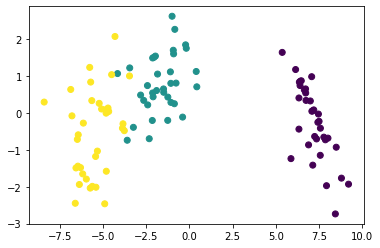

In [9]:
#LDA
import numpy as np
from sklearn import datasets    #datasets模块
from sklearn.model_selection import train_test_split    #分离训练集和测试集数据
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

loaded_data = datasets.load_iris()    #加载鸢尾花数据
X = loaded_data.data #x有4个属性
y = loaded_data.target #y 有三类

# print(X.shape)    #(150, 4)
# print(y.shape)    #(150,)    0,1,2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0,stratify=y)#测试数据占30%

print(X_train.shape)
print(y_train.shape)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X_train,y_train)
X_new = lda.transform(X_train)
plt.scatter(X_new[:, 0], X_new[:, 1],marker='o',c=y_train)
plt.savefig('123.jpg')
plt.show()

In [3]:
#感知器定义
class Network(object):
    def __init__(self, num_of_weights):
        # 随机产生w、b的初始值
        
        self.w = np.random.randn(num_of_weights, 1)
        self.b = np.random.random()
        
    def forward(self, x):
        z = np.dot(x, self.w) + self.b
        return z
    
    def loss(self, z, y):
        error = z - y
        num_samples = error.shape[0]
        cost = error * error
        cost = np.sum(cost) / num_samples
        return cost
    
    def gradient(self, x, y):
        z = self.forward(x)
        gradient_w = (z-y)*x
        gradient_w = np.mean(gradient_w, axis=0)
        gradient_w = gradient_w[:, np.newaxis]
        gradient_b = (z - y)
        gradient_b = np.mean(gradient_b)        
        return gradient_w, gradient_b
    
    def update(self, gradient_w, gradient_b, eta = 0.01):
        self.w = self.w - eta * gradient_w
        self.b = self.b - eta * gradient_b
        
    def train(self, x, y, iterations=100, eta=0.01):
        losses = []
        for i in range(iterations):
            z = self.forward(x)
            L = self.loss(z, y)
            gradient_w, gradient_b = self.gradient(x, y)
            self.update(gradient_w, gradient_b, eta)
            losses.append(L)
            
            if (i+1) % 50 == 0:
                print('iter {}, loss {}'.format(i, L))
        return losses

iter 49, loss 2.6652424138445276
iter 99, loss 1.0041467996433164
iter 149, loss 0.39613208289855223
iter 199, loss 0.1735790325998868
iter 249, loss 0.09211741854156756
iter 299, loss 0.06229983322390466
iter 349, loss 0.05138563265896621
iter 399, loss 0.04739068227305617
iter 449, loss 0.045928401230031134
iter 499, loss 0.04539315907625321
iter 549, loss 0.04519724313755775
iter 599, loss 0.045125531567824326
iter 649, loss 0.04509928281405841
iter 699, loss 0.045089674921261966
iter 749, loss 0.04508615812176698
iter 799, loss 0.045084870859414046
iter 849, loss 0.045084399679761154
iter 899, loss 0.04508422721276966
iter 949, loss 0.04508416408427297
iter 999, loss 0.045084140977201516


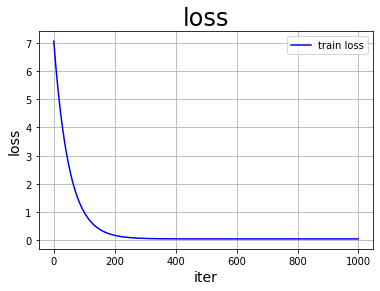

In [4]:
#数据归一化
newX_test = lda.transform(X_test)

mean = X_new.mean(axis = 0)
std = X_new.std(axis = 0)

X_new -= mean
X_new /= std

newX_test -= mean
newX_test /= std

# 获取数据
x = X_new
y = y_train.reshape((-1, 1))

# 创建网络
net = Network(2)

num_iterations=1000
# 启动训练
losses = net.train(x,y, iterations=num_iterations, eta=0.01)

# 画出损失函数的变化趋势
plot_x = np.arange(num_iterations)
plot_y = np.array(losses)

plt.title("loss", fontsize=24)
plt.xlabel("iter", fontsize=14)
plt.ylabel("loss", fontsize=14)

plt.plot(plot_x, plot_y,color='blue',label='train loss') 

plt.grid()
plt.legend()
plt.savefig('12345.jpg')
plt.show()

In [5]:
#测试
testX=newX_test
testY=y_test.astype(np.int32).reshape((-1, 1))
predictY = net.forward(testX)
predictY=np.round(predictY).astype(np.int32)
accuracy=list(testY == predictY).count(True)/testX.shape[0]
print('accuracy=',accuracy,'({}/{})'.format(list(testY == predictY).count(True), testX.shape[0]))

accuracy= 0.9777777777777777 (44/45)
